## 1. Frame the Problem

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

1] Problem statement  
- Build a prediction model for a health insurance company to predict the premium charge for policyholders.

## 2. Gahtering Data

Data is retrieved from Kaggle.
- Dataset Source - https://www.kaggle.com/datasets/simranjain17/insurance?select=insurance.csv

## 3. Data Preprocessing

importing Packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/content/insurance.csv")

shape of data

In [6]:
df.shape

(1338, 7)

Overview of data

In [7]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
847,23,male,50.380,1,no,southeast,2438.05520
75,57,male,34.010,0,no,northwest,11356.66090
935,59,female,27.500,0,no,southwest,12233.82800
314,27,female,31.400,0,yes,southwest,34838.87300


##### Duplicate Values

In [8]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df.loc[(df["bmi"]==30.59) & (df["charges"]==1639.5631)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


##### Data Type and non null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


##### age

In [ ]:
df.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

##### sex

In [ ]:
df.sex.value_counts()

,count
sex,
male,675
female,662


##### children

In [ ]:
df.children.value_counts()

,count
children,
0,573
1,324
2,240
3,157
4,25
5,18


##### smoker

In [ ]:
df.smoker.value_counts()

,count
smoker,
no,1063
yes,274


##### region

In [ ]:
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


## 4. EDA

Stats of data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


Correlation of data

In [ ]:
df.select_dtypes(include=["float64","int64"]).corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


### Univariate analysis

#### 1. Categorical Data

**a**. countplot

Text(0, 0.5, '')

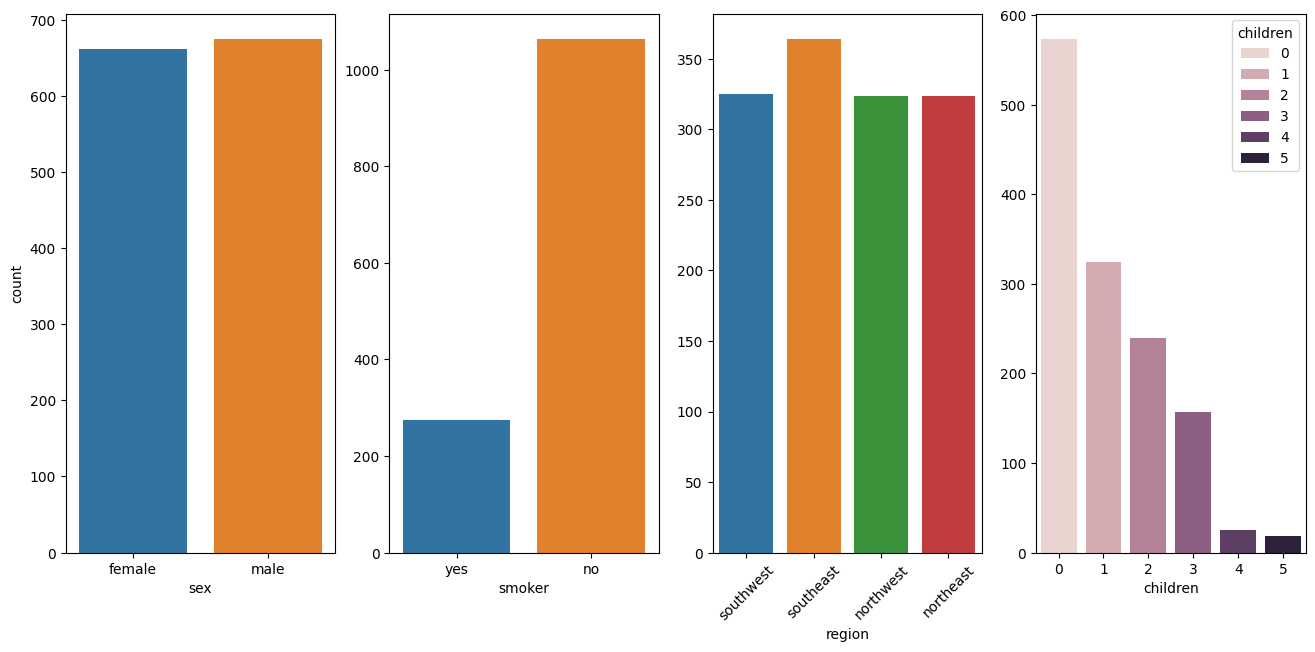

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,4,1)
sns.countplot(data = df, x= "sex" ,hue = "sex")

plt.subplot(1,4,2)
sns.countplot(data = df, x="smoker", hue="smoker")
plt.ylabel('')

plt.subplot(1,4,3)
sns.countplot(data = df , x= "region", hue = "region")
plt.xticks(rotation=45)
plt.ylabel('')

plt.subplot(1,4,4)
sns.countplot(data = df , x= "children", hue = "children")
plt.ylabel('')

- it show that proportions of male and female smokers are nearly the same
- Maximum number of customers are non-smoker
- most customers are from the "Southeast" region.
- Most customers have no children.

b. pie chart

(-1.25, 1.25, -1.25, 1.25)

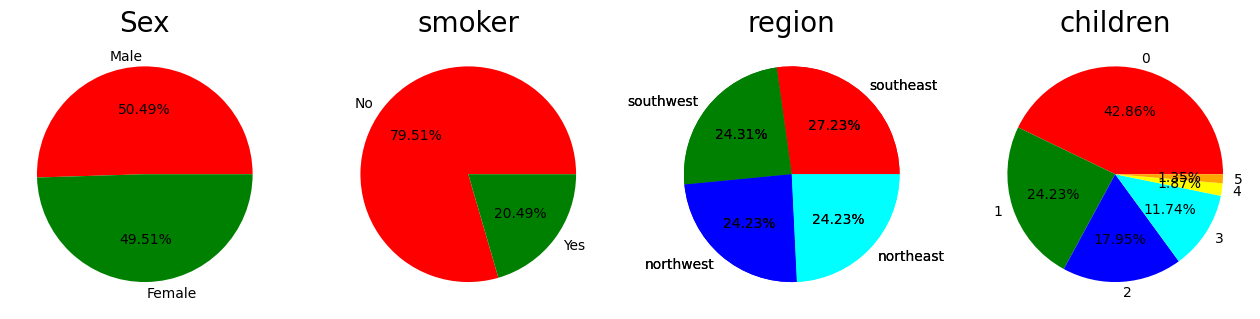

In [ ]:
plt.figure(figsize= (16,8))

plt.subplot(1, 4, 1)
size = df['sex'].value_counts()
labels = 'Male', 'Female'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Sex', fontsize = 20)
plt.axis('off')

plt.subplot(1, 4, 2)
size = df['smoker'].value_counts()
labels = 'No', 'Yes'
color = ['red', 'green']
plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('smoker', fontsize = 20)
plt.axis('off')

plt.subplot(1, 4, 3)
size = df['region'].value_counts()
labels = 'southeast', 'southwest', 'northwest', 'northeast',
color = ['red', 'green', 'blue', 'cyan']
plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('region', fontsize = 20)
plt.axis('off')

plt.subplot(1, 4, 3)
size = df['region'].value_counts()
labels = 'southeast', 'southwest', 'northwest', 'northeast',
color = ['red', 'green', 'blue', 'cyan']
plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('region', fontsize = 20)
plt.axis('off')

plt.subplot(1, 4, 4)
size = df['children'].value_counts()
labels = '0', '1', '2', '3','4','5'
color = ['red', 'green', 'blue', 'cyan', 'yellow', 'orange']
plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('children', fontsize = 20)
plt.axis('off')

The pie chart gives similar insights as above count plot, but in terms of relative frequency or proportional distribution

#### 2. Numerical Data

a. Histogram

<Axes: xlabel='charges', ylabel='Count'>

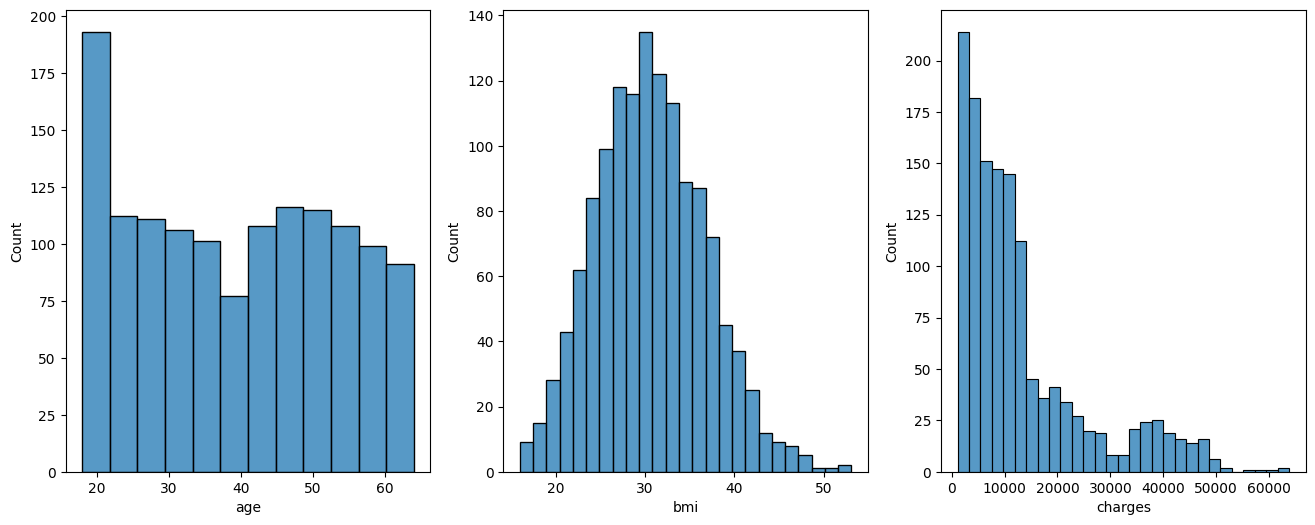

In [ ]:
plt.figure(figsize = (16,6))
plt.subplot(1,3,1)
sns.histplot(data=df, x=df.age)

plt.subplot(1,3,2)
sns.histplot(data=df, x=df.bmi)

plt.subplot(1,3,3)
sns.histplot(data=df, x=df.charges)

- The histogram of customer ages reveals a significant concentration of policyholders within the 20 to 35-year-old.  
The age distribution above 40 seems more balanced
- The highest frequency is around a BMI of 30.
- Only a few customers have the highest number of charges.

b. kdeplot

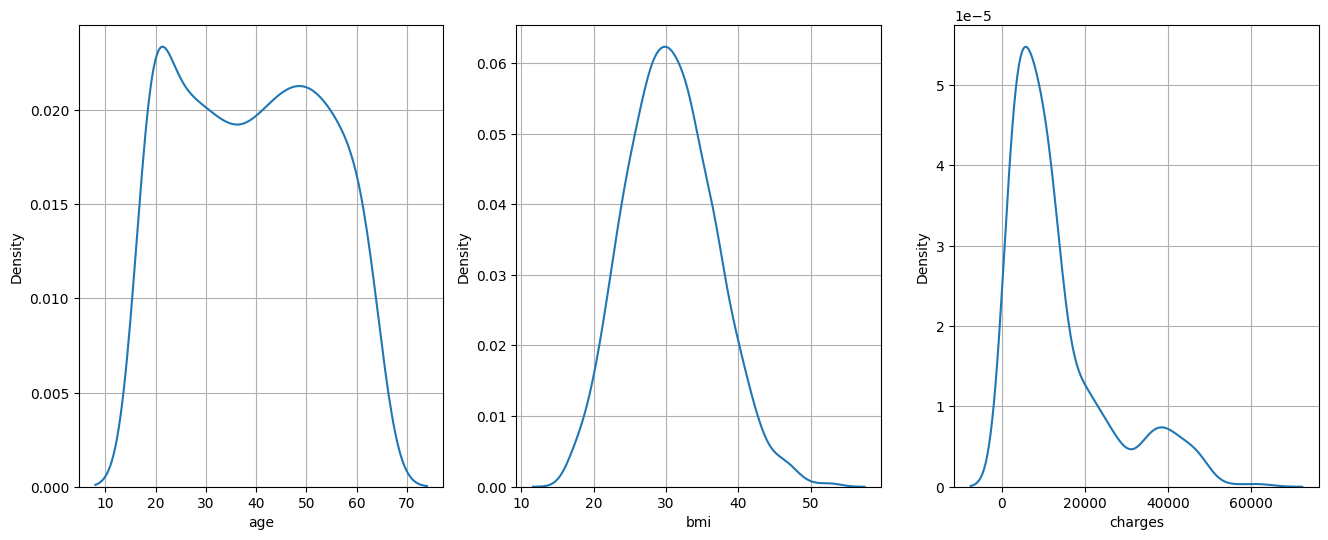

In [ ]:
plt.figure(figsize = (16,6))
plt.subplot(1,3,1)
sns.kdeplot(data=df, x=df.age)
plt.grid(True)

plt.subplot(1,3,2)
sns.kdeplot(data=df, x=df.bmi)
plt.grid(True)

plt.subplot(1,3,3)
sns.kdeplot(data=df, x=df.charges)
plt.grid(True)

plt.show()

- There is a lower probability density of customers aged 10 and 70
- There is the highest probability density of customers with a BMI of 30.
- There is a very low probability density of customers having charges above 60 thousand

c. Box Plot

<Axes: xlabel='charges'>

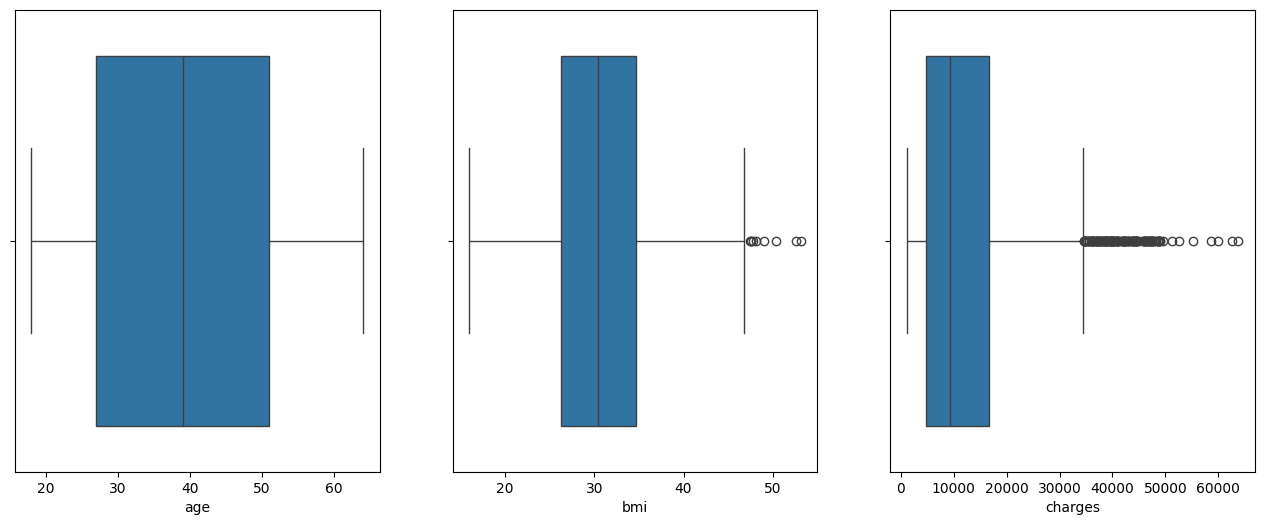

In [ ]:
plt.figure(figsize = (16,6))
plt.subplot(1,3,1)
sns.boxplot(data=df, x=df.age)

plt.subplot(1,3,2)
sns.boxplot(data=df, x=df.bmi)

plt.subplot(1,3,3)
sns.boxplot(data=df, x=df.charges)

- The charges show extreme skewness towards higher values and have significant outliers.

### Bivariate Analysis

##### 1. Scatter Plot
(numerical-numerical)

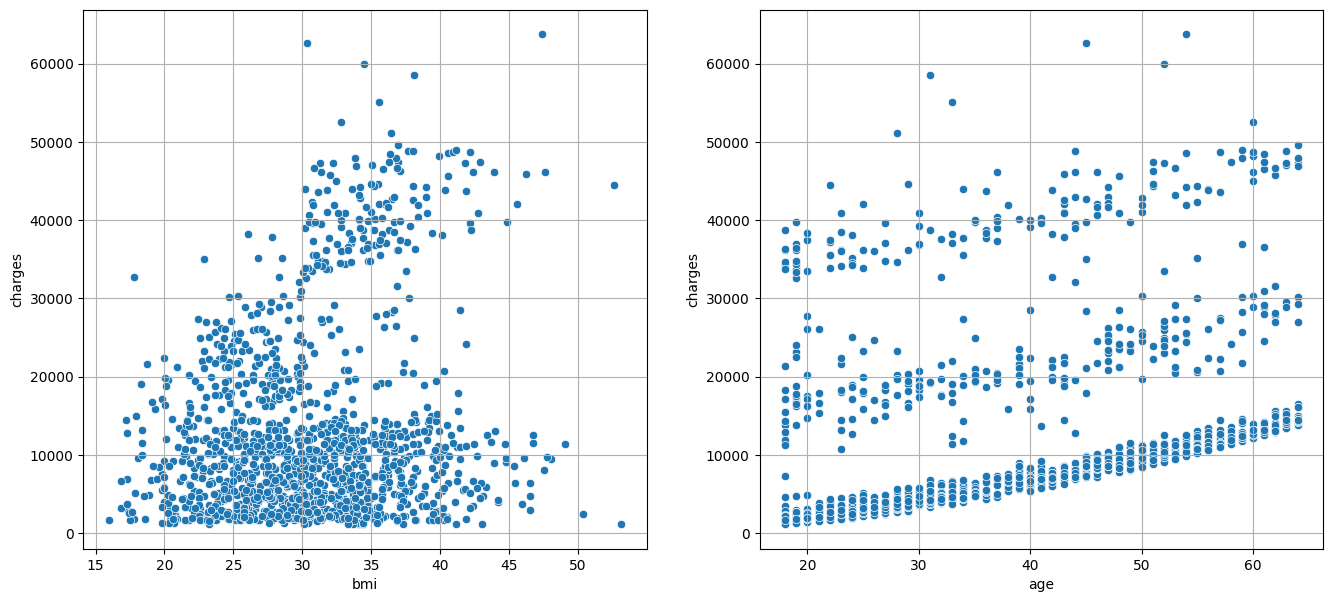

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="bmi", y="charges")
plt.grid()

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="age", y="charges")
plt.grid()

- For some customers as there is positive relationship between bmi and charges but for some customers charges remain constants as bmi increases.

- As age increases charges are also increases but there three patterns in charges  
Group with low charges, mid charges and high charges

##### 2. Bar Plot
(numerical - categrical)

Text(0, 0.5, '')

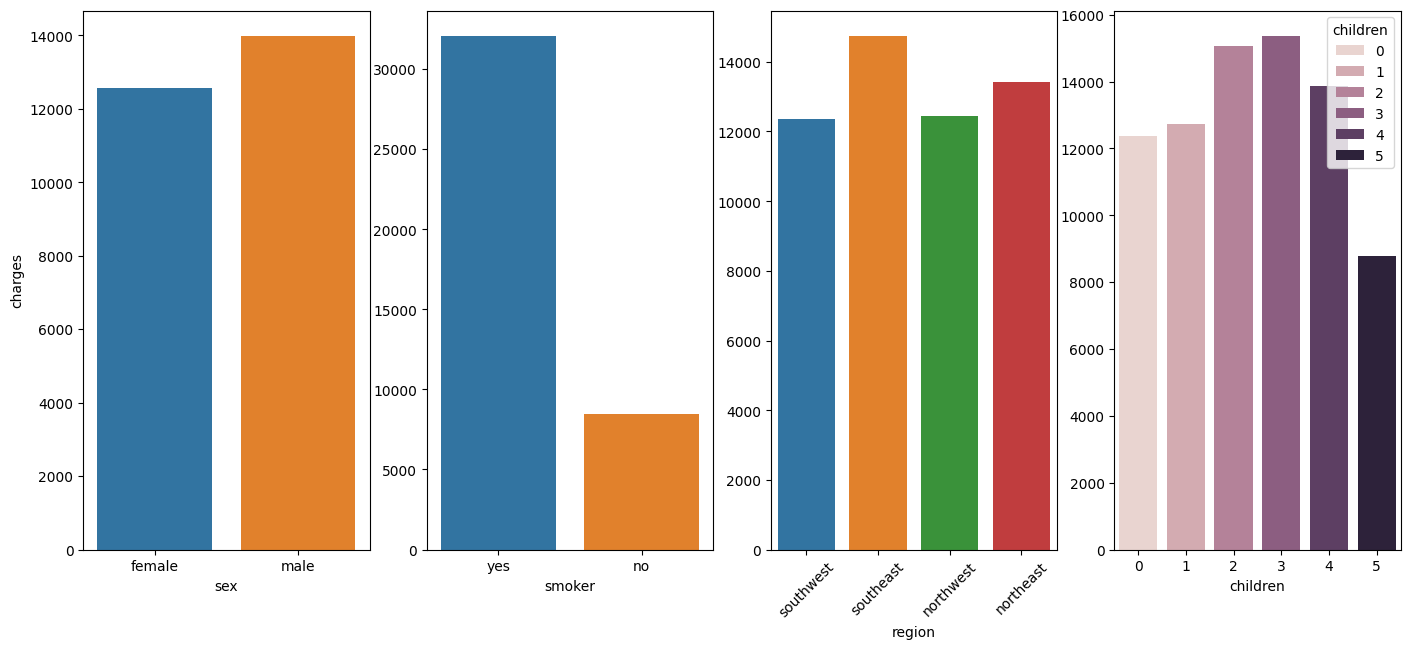

In [ ]:
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
sns.barplot(data = df, x= "sex", y="charges" ,hue = "sex", errorbar=None)

plt.subplot(1,4,2)
sns.barplot(data = df, x="smoker", y="charges", hue="smoker", errorbar=None)
plt.ylabel('')

plt.subplot(1,4,3)
sns.barplot(data = df , x= "region", y="charges", hue = "region", errorbar=None)
plt.xticks(rotation=45)
plt.ylabel('')

plt.subplot(1,4,4)
sns.barplot(data = df , x= "children", y="charges", hue = "children", errorbar=None)
plt.ylabel('')

-  average charges for males appear to be significantly higher than for females
- The charges for smokers are dramatically higher than for non-smokers
- The average charges vary by region. The Southeast has the highest charges
- The bar plot shows that charges do not vary drastically with the number of children. However, there is a slight increase but lower for customers having 5 childrean

##### 3. BoxPlot
(numerical - Categorical)

Text(0, 0.5, '')

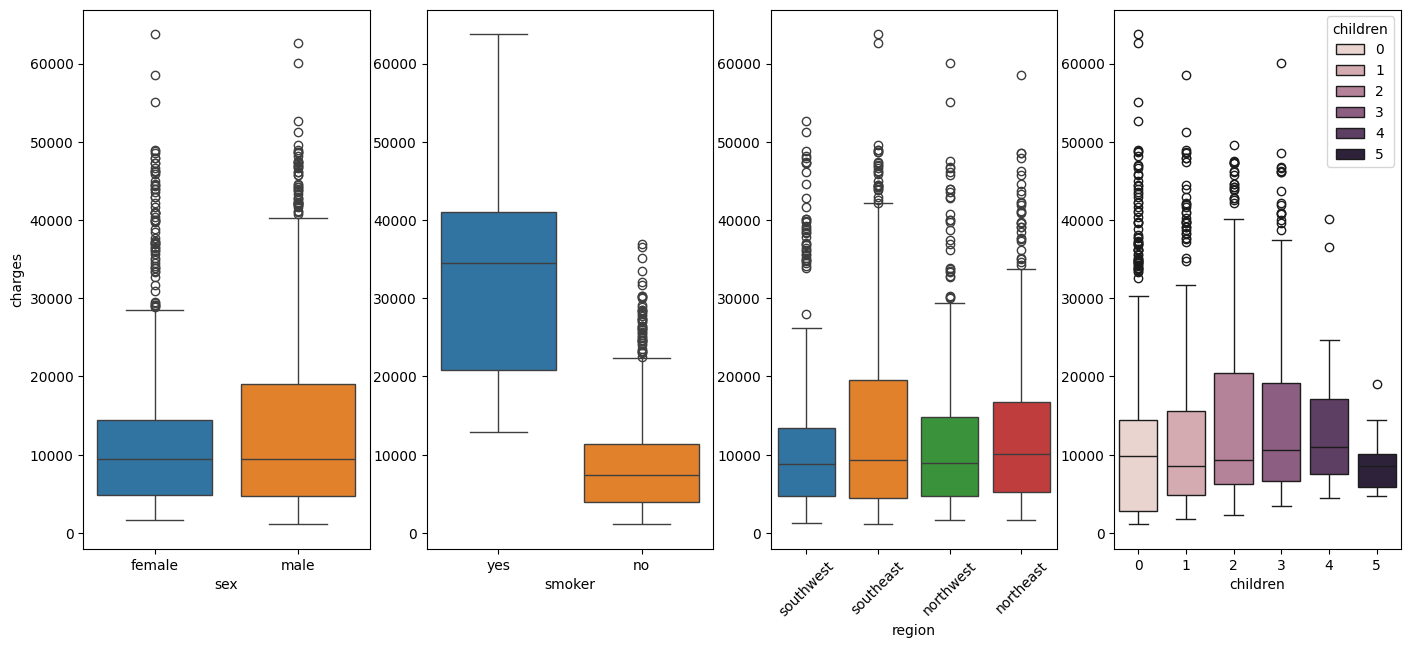

In [ ]:
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
sns.boxplot(data = df, x= "sex", y="charges" ,hue = "sex")

plt.subplot(1,4,2)
sns.boxplot(data = df, x="smoker", y="charges", hue="smoker")
plt.ylabel('')

plt.subplot(1,4,3)
sns.boxplot(data = df , x= "region", y="charges", hue = "region")
plt.xticks(rotation=45)
plt.ylabel('')

plt.subplot(1,4,4)
sns.boxplot(data = df , x= "children", y="charges", hue = "children")
plt.ylabel('')

Sex vs Charges: The box plot reveals minimal differences in median charges between males and females, suggesting that gender may not significantly influence insurance premiums.

Smoker vs Charges: A stark contrast is observed between smokers and non-smokers, with smokers facing higher median charges and a wider range of costs. This highlights the financial impact of smoking on premiums.

Region vs Charges: The box plot illustrates regional variations in insurance costs, with some areas exhibiting higher median charges and greater spread.Areas with higher charges suggests that medical costs of that region could be higher than other.

Children vs Charges: The analysis shows that as the number of children increases, median charges also tend to rise, indicating that family size affects insurance premiums but except customers with 5 children, the overall distribution of charges is lower.

##### 4. KDE
(numerical - categorical)

Text(0, 0.5, '')

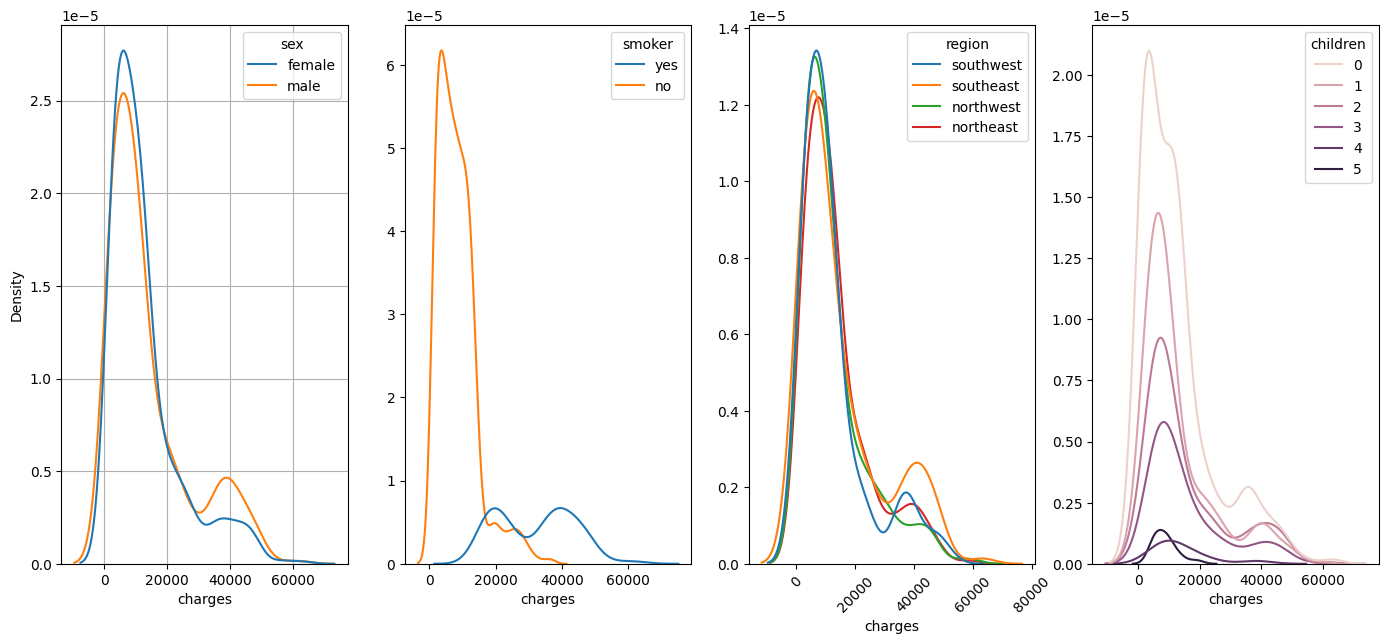

In [ ]:
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
sns.kdeplot(data = df, x="charges",hue = "sex")
plt.grid()

plt.subplot(1,4,2)
sns.kdeplot(data = df, x="charges", hue="smoker")
plt.ylabel('')

plt.subplot(1,4,3)
sns.kdeplot(data = df , x="charges", hue = "region")
plt.xticks(rotation=45)
plt.ylabel('')

plt.subplot(1,4,4)
sns.kdeplot(data = df , x= "charges", hue = "children")
plt.ylabel('')

- sex : There is a slight variation in the tails, indicating that charges for males and females could have some differences at higher charge values
- smoker: Non-smokers have a peak density at lower charge values, while smokers show a broader distribution with higher charges.
- region: There are slight variations, with the southeast and northeast having slightly more cases with higher charges
- children : there is a high probability density for customers with 0 children having insurance charges between 0 to 25,000.

##### 5. Heatmap
(categorical-categorical)

<Axes: xlabel='smoker', ylabel='region'>

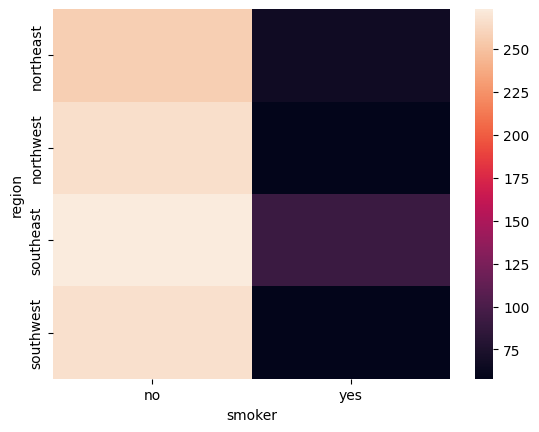

In [ ]:
sns.heatmap(pd.crosstab(df["region"], df["smoker"]))

Regions with darker shades in the smoker column indicate a higher concentration of smokers.
northeast and southwest regions have the highest number of non-smokers.

In [ ]:
pd.crosstab(df["region"], df["smoker"])

smoker,no,yes
region,,
northeast,257,67
northwest,266,58
southeast,273,91
southwest,267,58


### Mulitvariate Analysis

##### a. scatterplot

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='age', ylabel='charges'>

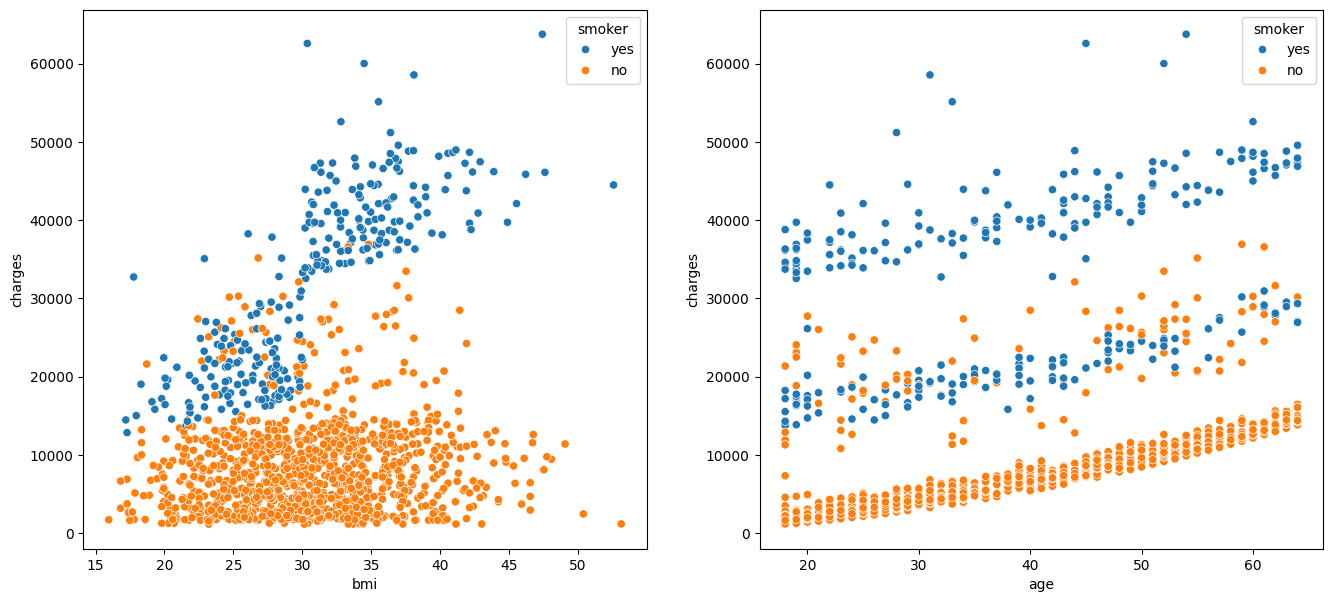

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker")

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="age", y="charges", hue="smoker")

1. Smoker Status is the most significant factor influencing insurance charges. Smokers, regardless of age or BMI, face much higher premiums.
2. BMI and Age individually contribute to higher charges, but their effect is much more  for smokers. Smokers with a high BMI or advanced age incur the highest charges, reflecting their greater health risks.

##### b.countplot

<Axes: xlabel='children', ylabel='charges'>

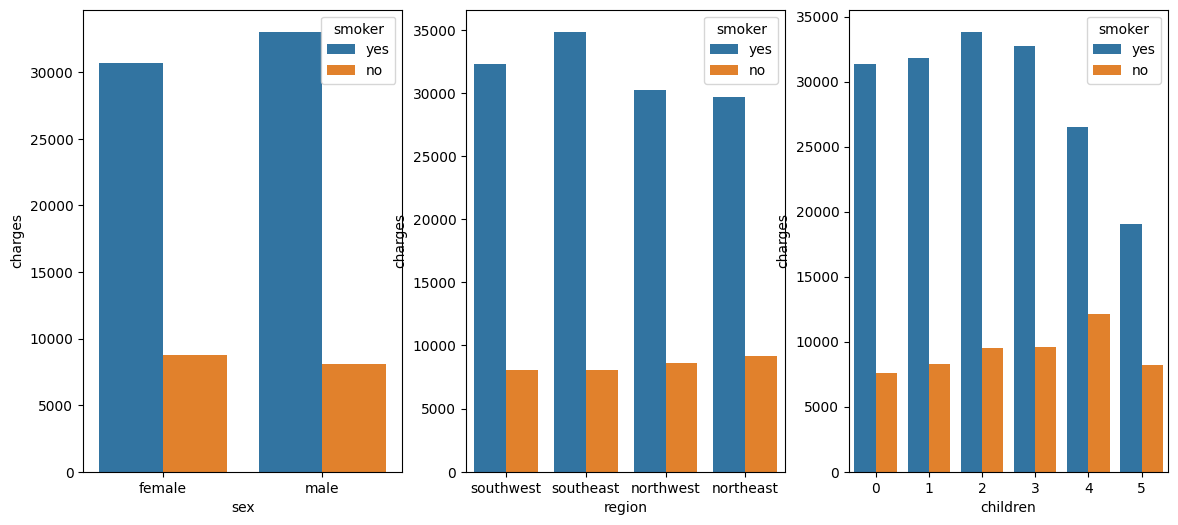

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
sns.barplot(data=df, x="sex", y="charges", hue="smoker", errorbar = None)

plt.subplot(1,3,2)
sns.barplot(data=df, x="region", y="charges", hue="smoker", errorbar = None)

plt.subplot(1,3,3)
sns.barplot(data=df, x="children", y ="charges" , hue="smoker", errorbar = None)

## 5. Feature Engineering and Feature Selection

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

split feature

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, y_test.shape

((1069, 6), (268,))

column transformer

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

standard_scaling= StandardScaler()
one_hot = OneHotEncoder()

ct = ColumnTransformer(transformers =
    [
        ("LabelEncoder", one_hot, cat_features),
         ("StandardScaler", standard_scaling, num_features),
    ],
    remainder = "passthrough"
)

In [ ]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

### Model building

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae ,model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae ,model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6104.5205
- Mean Absolute Error: 4106.8936
- Mean Squared Error: 37265170.5731
- R2 Score: 0.7278
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5835.2351
- Mean Absolute Error: 4023.6505
- Mean Squared Error: 34049968.1036
- R2 Score: 0.8147


Lasso
Model performance for Training set
- Root Mean Squared Error: 6081.1094
- Mean Absolute Error: 4182.0069
- Mean Squared Error: 36979891.2605
- R2 Score: 0.7299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5957.6161
- Mean Absolute Error: 4177.8572
- Mean Squared Error: 35493190.0791
- R2 Score: 0.8068


Ridge
Model performance for Training set
- Root Mean Squared Error: 6081.1696
- Mean Absolute Error: 4185.9403
- Mean Squared Error: 36980624.1713
- R2 Score: 0.7299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5964.2765
-

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.881509
6,XGBRegressor,0.859983
7,AdaBoost Regressor,0.840810
0,Linear Regression,0.814700
1,Lasso,0.806846
2,Ridge,0.806414
4,Decision Tree,0.789196
3,K-Neighbors Regressor,0.781590


 Random Forest Regressor is the top performer, followed by XGBRegressor and AdaBoost Regressor. Simpler models like Linear Regression, Lasso, and Ridge offer decent performance with easier interpretability, while Decision Tree and K-Neighbors Regressor are less effective for this particular dataset.

hyper parameter tuning

In [ ]:
# Define models and their hyperparameter spaces
from scipy.stats import randint, uniform
models = {
    "Linear_Regression": (LinearRegression(), {}),

    "Lasso": (Lasso(random_state=42), {
        'alpha': uniform(0.1, 10),
        'max_iter': randint(1000, 5000)
    }),

    "Ridge": (Ridge(random_state=42), {
        'alpha': uniform(0.1, 10),
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
    }),

    "K-Neighbors_Regressor": (KNeighborsRegressor(), {
        'n_neighbors': randint(3, 20),
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }),

    "Decision_Tree": (DecisionTreeRegressor(random_state=42), {
        'max_depth': randint(5, 50),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['sqrt', 'log2']
    }),

    "Random_Forest_Regressor": (RandomForestRegressor(random_state=42), {
        'n_estimators': randint(100, 1000),
        'max_depth': randint(10, 50),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['sqrt', 'log2']
    }),

    "XGBRegressor": (XGBRegressor(random_state=42), {
        'n_estimators': randint(100, 1000),
        'learning_rate': uniform(0.01, 0.3),
        'max_depth': randint(3, 10),
        'subsample': uniform(0.5, 0.5),
        'colsample_bytree': uniform(0.5, 0.5)
    }),

    "AdaBoost_Regressor": (AdaBoostRegressor(random_state=42), {
        'n_estimators': randint(50, 500),
        'learning_rate': uniform(0.01, 1.5),
        'loss': ['linear', 'square', 'exponential']
    })
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Dictionary to store the best models and their parameters
best_models = {}


for model_name, (model, param_dist) in models.items():
    print(f"Tuning {model_name}...")

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=50,
        cv=5,
        verbose=2,
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(X_train, y_train)

    # Storing best model and parameters
    best_models[model_name] = {
        'best_estimator': random_search.best_estimator_,
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_
    }

    print(f"Best Parameters for {model_name}: {random_search.best_params_}")
    print(f"Best CV Score for {model_name}: {random_search.best_score_}\n")


Tuning Linear_Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for Linear_Regression: {}
Best CV Score for Linear_Regression: 0.7225331149263013

Tuning Lasso...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for Lasso: {'alpha': 9.968869366005173, 'max_iter': 2367}
Best CV Score for Lasso: 0.7258601953438172

Tuning Ridge...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for Ridge: {'alpha': 3.845401188473625, 'solver': 'sag'}
Best CV Score for Ridge: 0.7258998914440736

Tuning K-Neighbors_Regressor...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for K-Neighbors_Regressor: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best CV Score for K-Neighbors_Regressor: 0.7543506929625092

Tuning Decision_Tree...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for Decision_Tree: {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 6}
Best CV Score for Decision_Tree: 0.804032418914666

In [ ]:
best_models

{'Linear_Regression': {'best_estimator': LinearRegression(),
  'best_params': {},
  'best_score': 0.7225331149263013},
 'Lasso': {'best_estimator': Lasso(alpha=9.968869366005173, max_iter=2367, random_state=42),
  'best_params': {'alpha': 9.968869366005173, 'max_iter': 2367},
  'best_score': 0.7258601953438172},
 'Ridge': {'best_estimator': Ridge(alpha=3.845401188473625, random_state=42, solver='sag'),
  'best_params': {'alpha': 3.845401188473625, 'solver': 'sag'},
  'best_score': 0.7258998914440736},
 'K-Neighbors_Regressor': {'best_estimator': KNeighborsRegressor(n_neighbors=7, p=1, weights='distance'),
  'best_params': {'n_neighbors': 7, 'p': 1, 'weights': 'distance'},
  'best_score': 0.7543506929625092},
 'Decision_Tree': {'best_estimator': DecisionTreeRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=9,
                        min_samples_split=6, random_state=42),
  'best_params': {'max_depth': 12,
   'max_features': 'sqrt',
   'min_samples_leaf': 9,
   'min_samples_s

In [ ]:
retrained_models = {}

for model_name, info in best_models.items():
    print(f"Retraining {model_name} with best parameters...")

    # Extract the best estimator from the results
    best_model = info['best_estimator']

    best_model.fit(X_train, y_train)

    retrained_models[model_name] = best_model

    print(f"{model_name} retrained successfully.\n")

Retraining Linear_Regression with best parameters...
Linear_Regression retrained successfully.

Retraining Lasso with best parameters...
Lasso retrained successfully.

Retraining Ridge with best parameters...
Ridge retrained successfully.

Retraining K-Neighbors_Regressor with best parameters...
K-Neighbors_Regressor retrained successfully.

Retraining Decision_Tree with best parameters...
Decision_Tree retrained successfully.

Retraining Random_Forest_Regressor with best parameters...
Random_Forest_Regressor retrained successfully.

Retraining XGBRegressor with best parameters...
XGBRegressor retrained successfully.

Retraining AdaBoost_Regressor with best parameters...
AdaBoost_Regressor retrained successfully.



In [ ]:
# Dictionary to store evaluation results for each model
evaluation_results = {}

for model_name, model in retrained_models.items():

    y_train_pred = model.predict(X_train)

    y_test_pred = model.predict(X_test)

    train_mae, train_mse, train_rmse, train_r2_square = evaluate_model(y_train, y_train_pred)

    test_mae, test_mse, test_rmse, test_r2_square = evaluate_model(y_test, y_test_pred)

    evaluation_results[model_name] = {
        'Train': {
            'MAE': train_mae,
            'MSE': train_mse,
            'RMSE': train_rmse,
            'R²': train_r2_square
        },
        'Test': {
            'MAE': test_mae,
            'MSE': test_mse,
            'RMSE': test_rmse,
            'R²': test_r2_square
        }
    }

    print(f"Evaluation results for {model_name}:")
    print("  Training Set:")
    print(f"    MAE: {train_mae:.4f}")
    print(f"    MSE: {train_mse:.4f}")
    print(f"    RMSE: {train_rmse:.4f}")
    print(f"    R²: {train_r2_square:.4f}")

    print("  Test Set:")
    print(f"    MAE: {test_mae:.4f}")
    print(f"    MSE: {test_mse:.4f}")
    print(f"    RMSE: {test_rmse:.4f}")
    print(f"    R²: {test_r2_square:.4f}\n")


Evaluation results for Linear_Regression:
  Training Set:
    MAE: 4106.8936
    MSE: 37265170.5731
    RMSE: 6104.5205
    R²: 0.7278
  Test Set:
    MAE: 4023.6505
    MSE: 34049968.1036
    RMSE: 5835.2351
    R²: 0.8147

Evaluation results for Lasso:
  Training Set:
    MAE: 4183.1324
    MSE: 36983231.1699
    RMSE: 6081.3840
    R²: 0.7299
  Test Set:
    MAE: 4185.3185
    MSE: 35639527.8229
    RMSE: 5969.8851
    R²: 0.8060

Evaluation results for Ridge:
  Training Set:
    MAE: 4197.3921
    MSE: 36990964.8966
    RMSE: 6082.0198
    R²: 0.7298
  Test Set:
    MAE: 4208.9019
    MSE: 35848081.0980
    RMSE: 5987.3267
    R²: 0.8049

Evaluation results for K-Neighbors_Regressor:
  Training Set:
    MAE: 0.0000
    MSE: 0.0000
    RMSE: 0.0000
    R²: 1.0000
  Test Set:
    MAE: 3599.6576
    MSE: 35454073.3008
    RMSE: 5954.3323
    R²: 0.8071

Evaluation results for Decision_Tree:
  Training Set:
    MAE: 3181.4232
    MSE: 26108940.4836
    RMSE: 5109.6908
    R²: 0.8093
  

In [ ]:
retrained_models

{'Linear_Regression': LinearRegression(),
 'Lasso': Lasso(alpha=9.968869366005173, max_iter=2367, random_state=42),
 'Ridge': Ridge(alpha=3.845401188473625, random_state=42, solver='sag'),
 'K-Neighbors_Regressor': KNeighborsRegressor(n_neighbors=7, p=1, weights='distance'),
 'Decision_Tree': DecisionTreeRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=9,
                       min_samples_split=6, random_state=42),
 'Random_Forest_Regressor': RandomForestRegressor(max_depth=42, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=3, n_estimators=152, random_state=42),
 'XGBRegressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8058265802441404, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
              importance_type=

### Creating Pickle File

In [ ]:
import pickle
xgb_model = retrained_models["XGBRegressor"]
with open('/content/drive/MyDrive/insurance_premium_prediction/pkl/xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)


In [ ]:
with open('/content/drive/MyDrive/insurance_premium_prediction/pkl/transformer.pkl', 'wb') as file:
    pickle.dump(ct, file)


### Testing Model

In [ ]:
import pickle

pickle_file_path = '/content/drive/MyDrive/insurance_premium_prediction/pkl/xgb_model.pkl'

with open(pickle_file_path, 'rb') as file:
    XGBRegressor = pickle.load(file)

In [ ]:
import pickle

transformer_file_path = '/content/drive/MyDrive/insurance_premium_prediction/pkl/transformer.pkl'
with open(transformer_file_path, 'rb') as file:
    transformer = pickle.load(file)

In [ ]:
input = transformer.transform(X.iloc[[0]])
input

array([[ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        , -1.44355713, -0.43650541,
        -0.90790804]])

In [ ]:
XGBRegressor.predict(input)[0], y.iloc[[0]][0]

(18366.684, 16884.924)